# Intensive Module in Machine Learning
# Problem set 8: Modern deep learning

If you are looking at the pdf/html version of this document, start by running the command `jupyter notebook` to launch an interactive notebook and then navigate to the correct folder and open this file `problem-set-8.ipynb`. Import your default packages for manipulating data and plotting:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline 

## Image classification for MNIST

You you tensorflow wrapper functions to download the data:

In [2]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/Users/ablaas/anaconda3/envs/tensorflow/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


The last step rescales the data.

## 1 Getting familiar with the data

Load the data as above. 

a) What does the rescaling do? 

b) Can you plot some of the images before and after rescaling. 

c) What are the dimensions of the tensors X and y? Can you reshape the image data X to be either in the format N x 28 x 28 or N x 784, where N is the number of images?

d) Discuss what is meant by one-hot encoding. Can you respape the label data y to be either in the format N x 1 (using digits 0,...,9) or N X 10 (using one-hot encoding)?

<span style="color:blue"> The rescaling (dividing by 255) forces values to be between 0 and 1 instead of 0 and 255.</span >

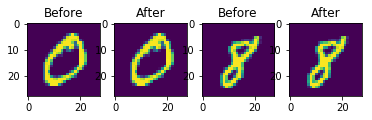

In [3]:
example1_new = x_train[1,:,:]
example1_old = 255*x_train[1,:,:]
image_array1_new = np.asarray(example1_new, dtype=np.float32).reshape((28, 28))
image_array1_old = np.asarray(example1_old, dtype=np.float32).reshape((28, 28))
example2_new = x_train[17,:,:]
example2_old = x_train[17,:,:]
image_array2_new = np.asarray(example2_new, dtype=np.float32).reshape((28, 28))
image_array2_old = np.asarray(example2_old, dtype=np.float32).reshape((28, 28))

plt.subplot(1, 4, 1)
plt.imshow(image_array1_old)#, cmap='gray')
plt.title('Before')

plt.subplot(1, 4, 2)
plt.imshow(image_array1_new)#, cmap='gray')
plt.title('After')

plt.subplot(1, 4, 3)
plt.imshow(image_array2_old)#, cmap='gray')
plt.title('Before')

plt.subplot(1, 4, 4)
plt.imshow(image_array2_new)#, cmap='gray')
plt.title('After')

plt.show()

In [7]:
print(np.shape(x_train))
print(np.shape(x_test))

(60000, 28, 28)
(10000, 28, 28)


<span style="color:blue"> As we can see, we have 60000 samples which are each of dimensionality (28,28), i.e. in pixel represantation. We can transform it to Nx784 using the reshape command</span >

In [4]:
x_train2 = x_train.reshape(60000,784)
x_test2 = x_test.reshape(10000,784)

In [5]:
#Let's create the one-hot-encoded versions of our labels
y_train2 = keras.utils.to_categorical(y_train, num_classes=10)
y_test2 = keras.utils.to_categorical(y_test, num_classes=10)

print(y_train2[1:10,:])

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 2 Feed forward neural network on MNIST

a) Build a one-hidden layer neural network using Keras with 512 hidden units.

b) Use a soft-max lawyer for the final layer and ReLUs for all other activation functions.

c) How do you define the loss function?

d) Train the neural network using batch gradient descent (with batch size 128) for a number of epochs. 

e) Produce plots showing the training and validation/test error (misclassification rate) as a function of epochs (training time).

f) Try to find a good value for the learning rate and report the performance of your best model.

In [10]:
model = Sequential()
model.add(Dense(units=512, activation='relu',input_dim=784))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])
# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [11]:
Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model.fit(x_train2, y_train2, epochs=100, batch_size=128, verbose=0, validation_split = 0.2, callbacks=[Early_Stop])
tacc,vacc = history.history['acc'], history.history['val_acc'] 

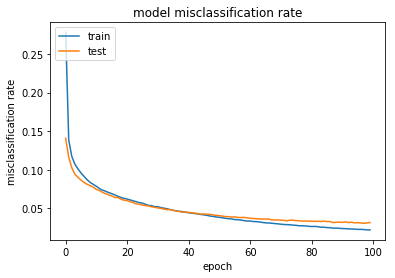

In [12]:
plt.plot(1.0-np.expand_dims(tacc,axis=1))
plt.plot(1.0-np.expand_dims(vacc,axis=1))
plt.title('model misclassification rate')
plt.ylabel('misclassification rate')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
learning_rates = [0.001,0.005,0.01,0.05,0.1,0.5]
scores = np.zeros(len(learning_rates))

for ii in range(0,len(learning_rates)):
    model = Sequential()
    model.add(Dense(units=512, activation='relu',input_dim=784))
    model.add(Dense(units=10, activation='softmax'))
    sgd = SGD(lr=learning_rates[ii], momentum=0.9, nesterov=True)
    model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
    history = model.fit(x_train2, y_train2, epochs=20, batch_size=128, verbose=0, validation_split = 0.2, callbacks=[Early_Stop])
    valid_acc = history.history['val_acc'][-1]
    scores[ii] = valid_acc
    print(learning_rates[ii])


0.001
0.005
0.01
0.05
0.1
Epoch 00012: early stopping
0.5


<span style="color:blue"> Let's inspect the best learning rate and the model performance of the corresponding model on test data </span >

In [20]:
print(learning_rates[np.argmax(scores)])

0.1


In [21]:
model = Sequential()
model.add(Dense(units=512, activation='relu',input_dim=784))
model.add(Dense(units=10, activation='softmax'))
sgd = SGD(lr=learning_rates[np.argmax(scores)], momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])
history = model.fit(x_train2, y_train2, epochs=20, batch_size=128, verbose=0, validation_split = 0.2, callbacks=[Early_Stop])
print(history.history['val_acc'][-1])

Epoch 00019: early stopping
0.9829166665077209


In [32]:
yprobas = model.predict(x_test2, batch_size=128)
ypred = yprobas.argmax(axis=-1)
test_acc = np.mean(np.equal(ypred, y_test))
print('Test set accuracy:',test_acc)

Test set accuracy: 0.9824


## 3 Modern techniques for regularisation and optimisation

a) Return to the model in the previous exercise and add a dropout layer for regularisation. How do the results compare? Look at the plots showing training/test error as a function of epochs.

b) Investigate the effect of dropout on some other architectures such as with one hidden layer of size 1024 or with two hidden layers of size 1024.

c) Now try the above with a different optimiser, the most popular choice being Adam. Look again at the plots showing training/test error as a function of epochs.

In [6]:
model2 = Sequential()
model2.add(Dense(units=512, activation='relu',input_dim=784))
model2.add(Dropout(0.2))
model2.add(Dense(units=10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])
# summarize the model
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [7]:
Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model2.fit(x_train2, y_train2, epochs=100, batch_size=128, verbose=0, validation_split = 0.2, callbacks=[Early_Stop])
tacc,vacc = history.history['acc'], history.history['val_acc'] 

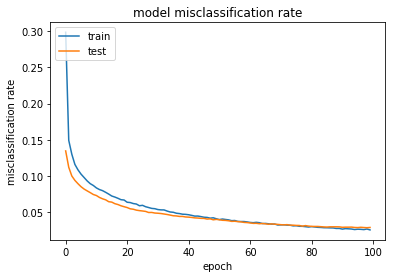

In [8]:
plt.plot(1.0-np.expand_dims(tacc,axis=1))
plt.plot(1.0-np.expand_dims(vacc,axis=1))
plt.title('model misclassification rate')
plt.ylabel('misclassification rate')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<span style="color:blue"> In order to do exercises 3 b) and c), replace and add the relevant bits of code above (all commented out below so that no errors appear when running through notebook), i.e. for b) instead of </span >

In [ ]:
# model2.add(Dense(units=512, activation='relu',input_dim=784))

<span style="color:blue"> use </span >

In [15]:
# model2.add(Dense(units=1024, activation='relu',input_dim=784))

<span style="color:blue"> and later add </span >

In [ ]:
# model2.add(Dense(units=1024, activation='relu'))
# model2.add(Dropout(0.2))

<span style="color:blue"> immediately after the first dropout layer. For c) simply change </span >

In [ ]:
# model2.compile(loss='categorical_crossentropy', optimizer='sgd',metrics=["accuracy"])

<span style="color:blue"> to </span >

In [ ]:
# model2.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

## 4 Convolutional Neural Networks (CNN)

This is a more advances exercise.

a) Use Keras to build a simple CNN using a convolutional layer followed by a fully connected one.

b) What are the new hyperparameters? Comment on your choices.

c) What does a max pooling layer do? Add a max pooling layer after the convolutional layer. 

d) Comment on your results. Did adding the max pooling layer make a big difference. If not, comment on when you would expect it to make a larger difference.

In [10]:
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D


#First, make sure train data is in the right shape for convolutional layers
x_train3 = x_train2.reshape(x_train2.shape[0], 28, 28 , 1).astype('float32')
x_test3 = x_test2.reshape(x_test2.shape[0], 28, 28 , 1).astype('float32')

model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3), padding="same", input_shape=(28, 28, 1), activation = 'relu'))
model3.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model3.add(Flatten())
model3.add(Dense(units=128, activation='relu'  ))
model3.add(Dropout(0.2))
model3.add(Dense(units=10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])
# summarize the model
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               802944    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 804,554
Trainable params: 804,554
Non-trainable params: 0
_________________________________________________________________


<span style="color:blue"> Max pooling helps to make the representation approximately invariant to small translations of the input. </span>

In [12]:
Early_Stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='auto')
history = model3.fit(x_train3, y_train2, epochs=100, batch_size=128, verbose=0, validation_split = 0.2, callbacks=[Early_Stop])
tacc,vacc = history.history['acc'], history.history['val_acc']

Epoch 00018: early stopping


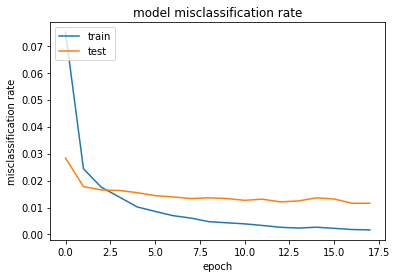

In [13]:
plt.plot(1.0-np.expand_dims(tacc,axis=1))
plt.plot(1.0-np.expand_dims(vacc,axis=1))
plt.title('model misclassification rate')
plt.ylabel('misclassification rate')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
yprobas = model3.predict(x_test3, batch_size=128)
ypred = yprobas.argmax(axis=-1)
test_acc = np.mean(np.equal(ypred, y_test))
print('Test set accuracy:',test_acc)

Test set accuracy: 0.9879


<span style="color:blue"> The difference is not as big as one could think, but also the accuracy of a network without convolutions was already above 98%. </span>